In [181]:
import msprime
import numpy as np
import scipy
from IPython.display import SVG
import tskit
#import allel
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import ternary
import collections
import random

import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=16)

### Ternary plot

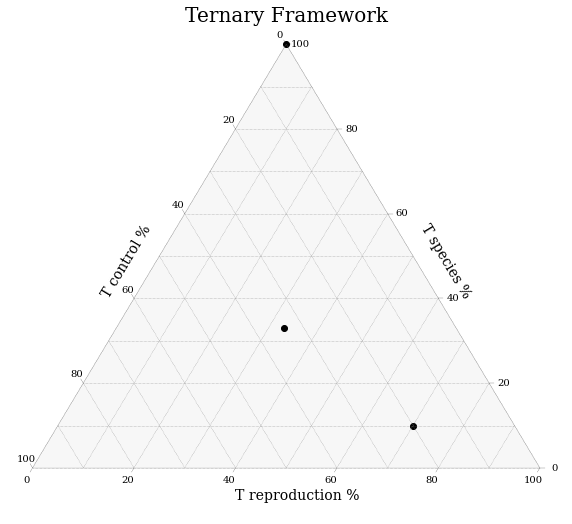

In [195]:
def tern_plot(data):
    # Set up the figure.
    fig, tax = ternary.figure(scale=100)
    fig.set_size_inches(10, 9)

    # Plot points.
    tax.scatter(data,color="black")

    # Axis labels. (See below for corner labels.)
    fontsize = 14
    offset = 0.08
    tax.left_axis_label("T control %", fontsize=fontsize, offset=offset)
    tax.right_axis_label("T species %", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("T reproduction %", fontsize=fontsize, offset=-offset)
    tax.set_title("Ternary Framework", fontsize=20)

    # Decoration.
    tax.boundary(linewidth=0.1)
    tax.gridlines(multiple=10, color="grey")
    tax.ticks(axis='lbr', linewidth=0.2, multiple=20)
    tax.get_axes().axis('off')

#tax.show()

tern_plot([[33,33,33],[0,100,0],[70,10,20]])

### Basic simulation

#### Setting length to 1, estimating mutation rate

Number of mutations:  32
(3, 10)


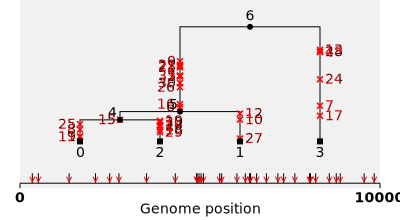

In [114]:
#Setting length to 1, estimating mutation rate

ts = msprime.sim_ancestry(2, sequence_length=10000) #, random_seed=1234)
mts = msprime.sim_mutations(ts, rate=0.0015) #, random_seed=5678)
#SVG(mts.draw_svg())

varsm=0
for var in mts.variants():
    #print(var.site.position, var.alleles, var.genotypes, sep="\t")
    varsm+=1
print("Number of mutations: ", varsm)
for t in ts.trees():
            print(t.rank())
    
SVG(mts.draw_svg(size=(400, 220)))

In [115]:
def sim_replicates(num_replicates):
    ancestry_reps = msprime.sim_ancestry(
        samples=2, sequence_length=10000,
        num_replicates=num_replicates)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        yield mutated_ts

In [105]:
def sim_replicates(num_replicates):
    ancestry_reps = msprime.sim_ancestry(
        samples=2, sequence_length=10000,
        num_replicates=num_replicates)
    for ts in ancestry_reps:
        mutated_ts = msprime.sim_mutations(ts, rate=(1/10000))
        for t in ts.trees():
            print(t.rank())
        #yield mutated_ts

In [62]:
sim_replicates(num_replicates)

(4, 2)
(3, 1)
(3, 6)
(3, 8)


### Summarizing topologies

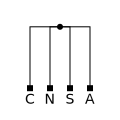

(0, 0)


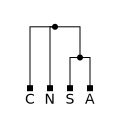

(1, 0)


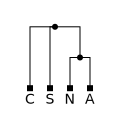

(1, 1)


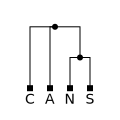

(1, 2)


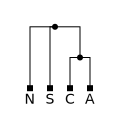

(1, 3)


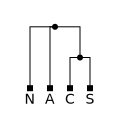

(1, 4)


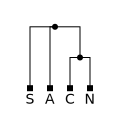

(1, 5)


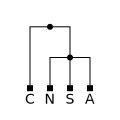

(2, 0)


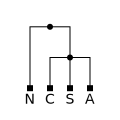

(2, 1)


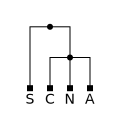

(2, 2)


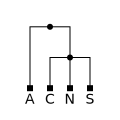

(2, 3)


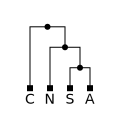

(3, 0)


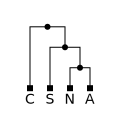

(3, 1)


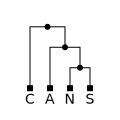

(3, 2)


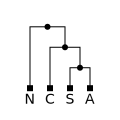

(3, 3)


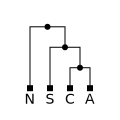

(3, 4)


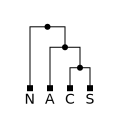

(3, 5)


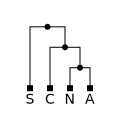

(3, 6)


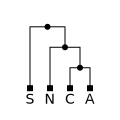

(3, 7)


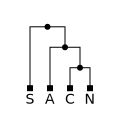

(3, 8)


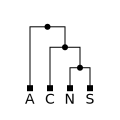

(3, 9)


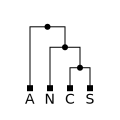

(3, 10)


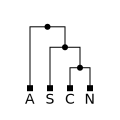

(3, 11)


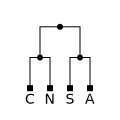

(4, 0)


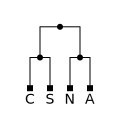

(4, 1)


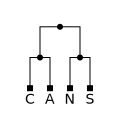

(4, 2)


In [121]:
#Visualizing topologies
for t in tskit.all_trees(num_leaves=4):
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "N", 2: "S",3:"A"}, order="tree", size=(120, 120))))
    print(t.rank())

In [ ]:
#Counter({(4, 2): 1087,
#         (3, 2): 516,
#         (4, 0): 1087,
#         (4, 1): 1126,
#         (3, 11): 542,
#         (3, 10): 563,
#         (3, 8): 560,
#         (3, 0): 554,
#         (3, 9): 582,
#         (3, 6): 553,
#         (3, 3): 559,
#         (3, 7): 554,
#         (3, 5): 569,
#         (3, 1): 584,
#         (3, 4): 564})

Topology r
Visualizing rank (3, 2)


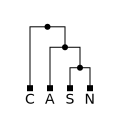

Visualizing rank (3, 4)


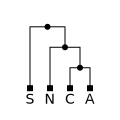

Visualizing rank (3, 9)


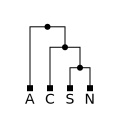

Visualizing rank (3, 7)


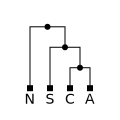

Visualizing rank (4, 2)


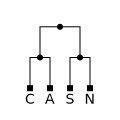

In [134]:
print("Topology r")
for rank in [(3,2), (3, 4), (3, 9),(3,7), (4, 2)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

Topology c
Visualizing rank (4, 1)


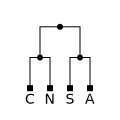

Visualizing rank (3, 10)


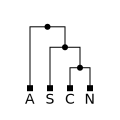

Visualizing rank (3, 6)


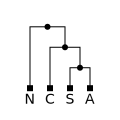

Visualizing rank (3, 5)


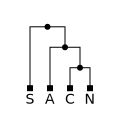

Visualizing rank (3, 1)


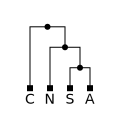

In [135]:
print("Topology c")
for rank in [(4,1), (3, 10), (3, 6),(3,5), (3, 1)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

Topology s
Visualizing rank (4, 0)


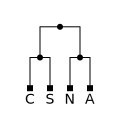

Visualizing rank (3, 11)


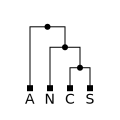

Visualizing rank (3, 8)


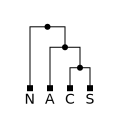

Visualizing rank (3, 0)


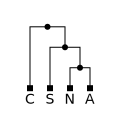

Visualizing rank (3, 3)


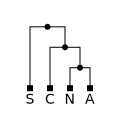

In [136]:
print("Topology s")
for rank in [(4,0), (3, 11), (3, 8),(3,0), (3, 3)]:
    t = tskit.Tree.unrank(num_leaves=4, rank=rank)
    print("Visualizing rank", rank)
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "S", 2: "N", 3 : "A"}, order="tree", size=(120, 120))))

In [132]:
num_replicates = 100000
#ranks = np.zeros(num_replicates)
ranks=[]
for replicate_index, ts in enumerate(sim_replicates(num_replicates)):
    for t in ts.trees():
        #print(t.rank())
        ranks+=[t.rank()]
        
print(ranks)

[(3, 4), (3, 9), (3, 3), (4, 2), (3, 8), (4, 0), (3, 2), (3, 10), (3, 6), (3, 5), (3, 10), (3, 10), (4, 1), (3, 8), (4, 0), (3, 10), (3, 2), (3, 9), (3, 4), (4, 1), (4, 0), (4, 1), (3, 9), (3, 4), (3, 10), (4, 1), (4, 2), (3, 0), (4, 1), (3, 10), (3, 9), (4, 2), (3, 8), (3, 10), (3, 8), (3, 11), (3, 5), (3, 2), (3, 1), (3, 0), (3, 7), (3, 0), (3, 1), (3, 2), (3, 8), (3, 0), (3, 0), (4, 0), (4, 0), (4, 2), (4, 2), (3, 0), (3, 7), (4, 1), (3, 6), (4, 0), (3, 11), (3, 3), (3, 7), (3, 1), (3, 6), (3, 2), (3, 0), (4, 0), (4, 0), (3, 3), (3, 4), (3, 1), (4, 2), (4, 0), (4, 1), (3, 3), (3, 7), (3, 7), (3, 10), (3, 1), (3, 7), (3, 8), (4, 2), (3, 5), (3, 9), (3, 8), (3, 6), (3, 7), (4, 1), (4, 1), (3, 9), (3, 5), (4, 0), (4, 1), (3, 4), (3, 0), (3, 7), (3, 3), (4, 2), (4, 1), (3, 10), (4, 2), (4, 1), (4, 2), (3, 8), (3, 9), (3, 7), (3, 0), (3, 9), (3, 1), (4, 0), (3, 3), (4, 1), (3, 5), (3, 1), (3, 6), (4, 2), (3, 5), (3, 7), (3, 2), (3, 11), (3, 7), (3, 8), (3, 7), (3, 9), (3, 8), (4, 2), (3,

In [147]:
#Summarize Topology s
#for rank in [(4,0), (3, 11), (3, 8),(3,0), (3, 3)]:
collections.Counter(ranks)[(3, 4)][(3, 8)]

TypeError: 'int' object is not subscriptable

In [171]:
ranks[1:10]

[(3, 9), (3, 3), (4, 2), (3, 8), (4, 0), (3, 2), (3, 10), (3, 6), (3, 5)]

In [ ]:
from itertools import chain, islice

def ichunked(seq, chunksize):
    """Yields items from an iterator in iterable chunks."""
    it = iter(seq)
    while True:
        yield chain([it.next()], islice(it, chunksize-1))

def chunked(seq, chunksize):
    """Yields items from an iterator in list chunks."""
    for chunk in ichunked(seq, chunksize):
        yield list(chunk)

In [187]:
#rank_dict=collections.Counter(ranks[0:10000])
n_subtrees=100
rank_dict=collections.Counter(random.sample(ranks, n_subtrees))
#name = "ABC"
topS_count = []
topC_count = []
topR_count = []
#(4,0),(3, 11),(3, 8),(3,0),(3, 3)]
#for character in name:
for key, value in rank_dict.items():
    print(key, value)
    if key == (4,0) or key == (3,11) or \
        key == (3,8) or key == (3,0) or key == (3,3):    #TOPOLOGY S
        topS_count.append(value)
        #TOPOLOGY S
    elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
        topC_count.append(value)
        # TOPOLOGY C
    else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
        topR_count.append(value)
        # TOPOLOGY R
#sum(values)

print(topS_count, topC_count, topR_count)
print(sum(topS_count), sum(topC_count), sum(topR_count))
print(sum(topS_count) + sum(topC_count) + sum(topR_count))

one_value=[(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees]
print([(sum(topS_count)/n_subtrees),sum(topC_count)/n_subtrees,sum(topR_count)/n_subtrees])

(4, 2) 9
(3, 0) 7
(3, 5) 4
(4, 0) 14
(4, 1) 12
(3, 8) 7
(3, 7) 8
(3, 2) 5
(3, 9) 4
(3, 3) 5
(3, 1) 8
(3, 6) 6
(3, 10) 5
(3, 4) 2
(3, 11) 4
[7, 14, 7, 5, 4] [4, 12, 8, 6, 5] [9, 8, 5, 4, 2]
37 35 28
100
[0.37, 0.35, 0.28]


In [204]:
#rank_dict=collections.Counter(ranks[0:10000])
n_subtrees=100
topo_weight=[]
for _ in range(1000):
    topS_count = []
    topC_count = []
    topR_count = []
    rank_dict=collections.Counter(random.sample(ranks, n_subtrees))
#(4,0),(3, 11),(3, 8),(3,0),(3, 3)]
#for character in name:
    for key, value in rank_dict.items():
        #print(key, value)
        if key == (4,0) or key == (3,11) or \
            key == (3,8) or key == (3,0) or key == (3,3):    #TOPOLOGY S
            topS_count.append(value)
        #TOPOLOGY S
        elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
            topC_count.append(value)
        # TOPOLOGY C
        else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
            topR_count.append(value)
        # TOPOLOGY R

    one_value=[(sum(topS_count)),sum(topC_count),sum(topR_count)]
    print(one_value)
    topo_weight.append(one_value)

[40, 28, 32]
[31, 34, 35]
[37, 24, 39]
[35, 32, 33]
[39, 36, 25]
[37, 34, 29]
[40, 30, 30]
[34, 34, 32]
[34, 37, 29]
[39, 34, 27]
[33, 40, 27]
[26, 38, 36]
[25, 39, 36]
[34, 30, 36]
[35, 28, 37]
[36, 37, 27]
[41, 34, 25]
[38, 32, 30]
[30, 33, 37]
[33, 38, 29]
[36, 29, 35]
[33, 38, 29]
[37, 28, 35]
[35, 27, 38]
[35, 37, 28]
[36, 36, 28]
[34, 31, 35]
[25, 36, 39]
[31, 33, 36]
[26, 42, 32]
[34, 33, 33]
[30, 37, 33]
[31, 31, 38]
[34, 39, 27]
[34, 33, 33]
[26, 33, 41]
[38, 28, 34]
[37, 27, 36]
[35, 38, 27]
[31, 32, 37]
[33, 32, 35]
[37, 38, 25]
[26, 36, 38]
[37, 38, 25]
[38, 34, 28]
[30, 36, 34]
[36, 28, 36]
[30, 36, 34]
[24, 38, 38]
[34, 30, 36]
[31, 34, 35]
[34, 36, 30]
[27, 36, 37]
[34, 38, 28]
[31, 33, 36]
[27, 41, 32]
[32, 29, 39]
[35, 30, 35]
[27, 35, 38]
[37, 29, 34]
[34, 27, 39]
[27, 31, 42]
[29, 33, 38]
[37, 31, 32]
[34, 32, 34]
[32, 32, 36]
[31, 41, 28]
[28, 34, 38]
[32, 34, 34]
[26, 38, 36]
[32, 38, 30]
[37, 33, 30]
[32, 35, 33]
[42, 32, 26]
[28, 43, 29]
[37, 26, 37]
[32, 23, 45]

[31, 37, 32]
[37, 29, 34]
[35, 30, 35]
[42, 30, 28]
[31, 31, 38]
[41, 27, 32]
[31, 42, 27]
[33, 29, 38]
[30, 33, 37]
[34, 30, 36]
[41, 25, 34]
[41, 32, 27]
[35, 36, 29]
[28, 37, 35]
[37, 37, 26]
[38, 29, 33]
[42, 28, 30]
[31, 38, 31]
[27, 39, 34]
[35, 31, 34]
[36, 33, 31]
[29, 34, 37]
[34, 35, 31]
[35, 32, 33]
[31, 32, 37]
[31, 33, 36]
[40, 37, 23]
[32, 32, 36]
[37, 33, 30]
[27, 43, 30]
[31, 34, 35]
[32, 36, 32]
[32, 33, 35]
[36, 34, 30]
[31, 40, 29]
[32, 29, 39]
[25, 40, 35]
[35, 34, 31]
[33, 37, 30]
[35, 28, 37]
[35, 34, 31]
[27, 31, 42]
[22, 36, 42]
[32, 32, 36]
[29, 38, 33]
[34, 32, 34]
[37, 30, 33]
[33, 31, 36]
[16, 39, 45]
[32, 41, 27]
[29, 35, 36]
[34, 30, 36]
[30, 28, 42]
[28, 29, 43]
[29, 38, 33]
[27, 41, 32]
[42, 22, 36]
[30, 30, 40]
[39, 30, 31]
[29, 34, 37]
[32, 39, 29]
[30, 32, 38]
[30, 33, 37]
[30, 33, 37]
[36, 27, 37]
[33, 31, 36]
[40, 32, 28]
[30, 34, 36]
[30, 35, 35]
[29, 30, 41]
[31, 33, 36]
[40, 30, 30]
[27, 35, 38]
[36, 30, 34]
[41, 35, 24]
[27, 40, 33]
[30, 41, 29]

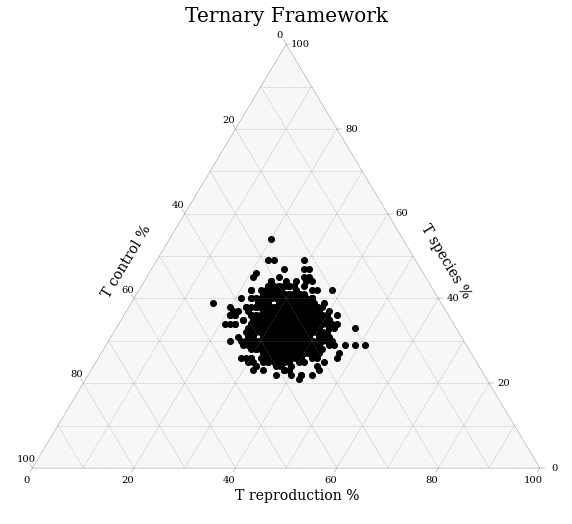

In [205]:
tern_plot(topo_weight)

In [ ]:
rank_dict=collections.Counter(ranks)

#name = "ABC"
topS_count = []
topC_count = []
topR_count = []
#(4,0),(3, 11),(3, 8),(3,0),(3, 3)]
#for character in name:
for key, value in rank_dict.items():
    print(key, value)
    if key == (4,0) or key == (3,11) or \
        key == (3,8) or key == (3,0) or key == (3,3):    #TOPOLOGY S
        topS_count.append(value)
        #TOPOLOGY S
    elif key == (4,1) or key == (3, 10) or key ==(3, 6) or key == (3,5) or key == (3, 1):
        topC_count.append(value)
        # TOPOLOGY C
    else:
        #key == (3,2) or key == (3, 4) or key == (3, 9) or key == (3,7) or key == (4, 2):
        topR_count.append(value)
        # TOPOLOGY R
#sum(values)

print(topS_count, topC_count, topR_count)
print(sum(topS_count), sum(topC_count), sum(topR_count))
print(sum(topS_count) + sum(topC_count) + sum(topR_count))

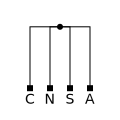

(0, 0)


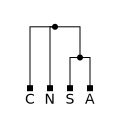

(1, 0)


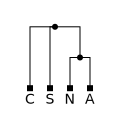

(1, 1)


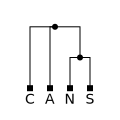

(1, 2)


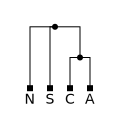

(1, 3)


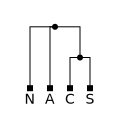

(1, 4)


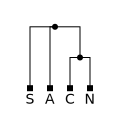

(1, 5)


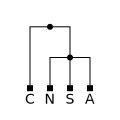

(2, 0)


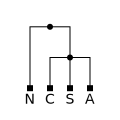

(2, 1)


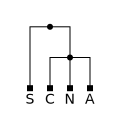

(2, 2)


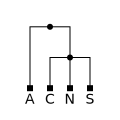

(2, 3)


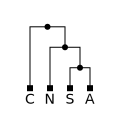

(3, 0)


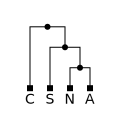

(3, 1)


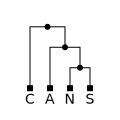

(3, 2)


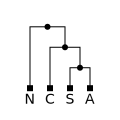

(3, 3)


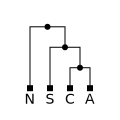

(3, 4)


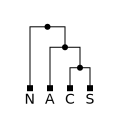

(3, 5)


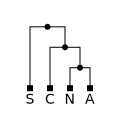

(3, 6)


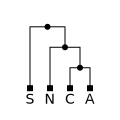

(3, 7)


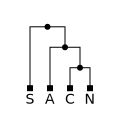

(3, 8)


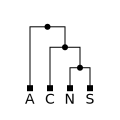

(3, 9)


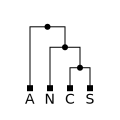

(3, 10)


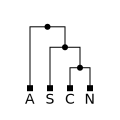

(3, 11)


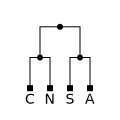

(4, 0)


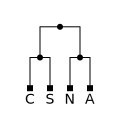

(4, 1)


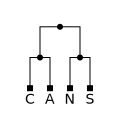

(4, 2)


In [8]:
for t in tskit.all_trees(num_leaves=4):
    display(SVG(t.draw_svg(node_labels={0: "C", 1: "N", 2: "S",3:"A"}, order="tree", size=(120, 120))))
    print(t.rank())

### Demographic model: neutral

In [208]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=1000)
demography.add_population(name="B", initial_size=1000)
demography.add_population(name="C", initial_size=1000)
demography.add_population_split(time=1000, derived=["A", "B"], ancestral="C")
demography.debug()
#ts = msprime.sim_ancestry(samples={"A": 1, "B": 1}, demography=demography, random_seed=12)
#ts

### Demographic model 2

### Demographic model 3